In [65]:
import numpy as np
import matplotlib.pyplot as plt

## Interpolate

In [66]:
x = np.linspace(0, 10, 11)
y = x ** 2

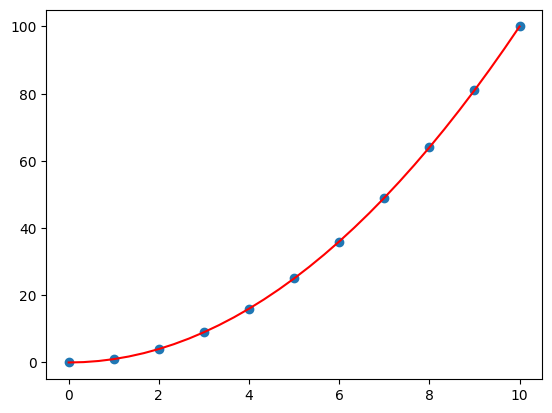

In [67]:
from scipy.interpolate import interp1d

f = interp1d(x, y, kind="quadratic")
xi = np.linspace(0, 10, 31)
yi = f(xi)

plt.plot(xi, yi, c='red')
plt.scatter(x, y)

## Optimize

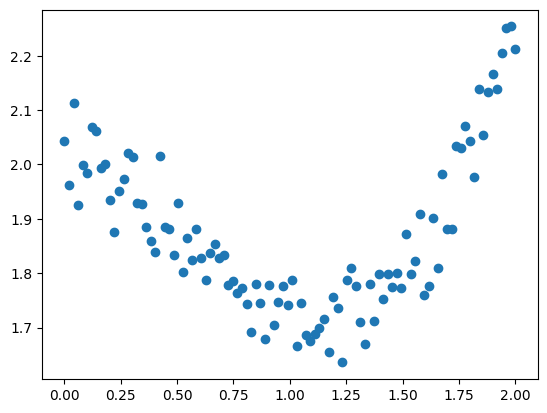

In [68]:
x = np.linspace(0, 2, 100)
y = 1/3 * x**3 - 3/5 * x**2 + 2 + np.random.randn(x.shape[0])/20

plt.scatter(x, y)

In [69]:
def f (x, a, b, c, d):
    return a * x**3 + b * x **2 + c*x + d

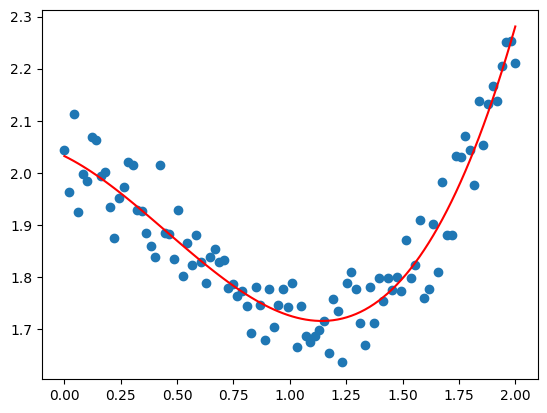

In [70]:
from scipy import optimize

params, param_cov = optimize.curve_fit(f, x, y)

y2 = f(x, *params)
plt.plot(x, y2, c='red')
plt.scatter(x, y)

## Minimization

In [71]:
def f(x):
    return x**2 + 15*np.sin(x)

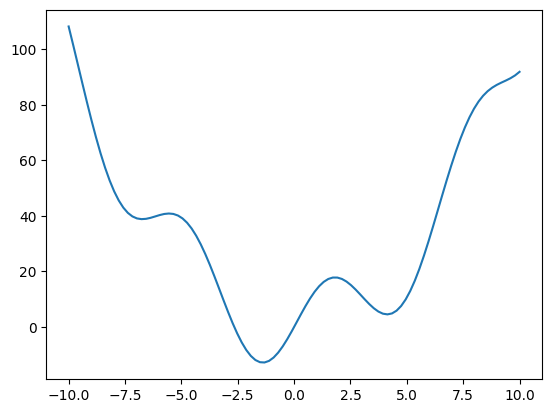

In [72]:
x = np.linspace(-10, 10, 100)
plt.plot(x, f(x))

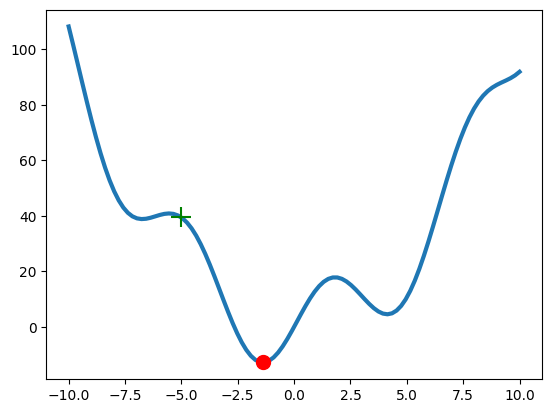

In [73]:
x0 = -5
result = optimize.minimize(f, x0=x0).x

plt.plot(x, f(x), lw=3, zorder=-1)
plt.scatter(result, f(result), s=100, c='r', zorder=1)
plt.scatter(x0, f(x0), s=200, c='g', marker='+', zorder=2)
plt.show()

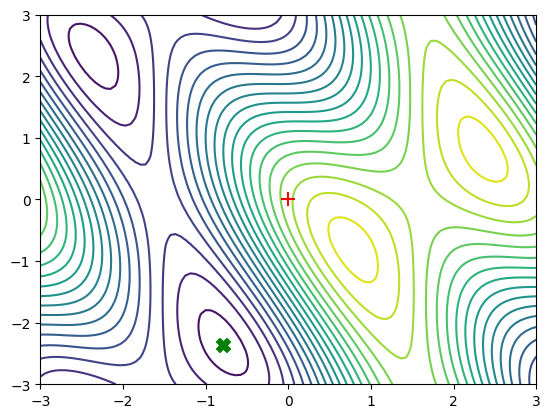

In [74]:
f = lambda x: np.sin(x[0])+np.cos(x[0]+x[1])*np.cos(x[0])

X = np.linspace(-3, 3, 100)
Y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(X, Y)
Z = f(np.array([X, Y]))

x0 = np.zeros((2,))

result = optimize.minimize(f, x0=x0).x

plt.contour(X, Y, Z, 20, zorder=-1)
plt.scatter(x0[0], x0[1], marker="+", c="red", s=100, zorder=1)
plt.scatter(result[0], result[1], marker="X", c="green", s=100, zorder=2)

## Signal processing

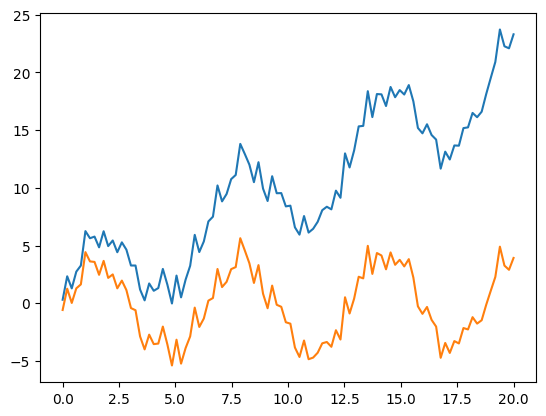

In [75]:
from scipy import signal

x = np.linspace(0, 20, 100)
y = x + 4*np.sin(x)+np.random.randn(x.shape[0])
y2 = signal.detrend(y)
plt.plot(x, y)
plt.plot(x, y2)

### FFT

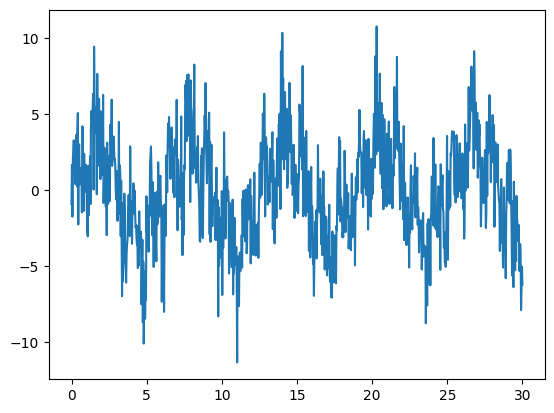

In [76]:
x = np.linspace(0, 30, 1000)
y = 3*np.sin(x) + 2*np.sin(5*x) + np.sin(10*x) + 2*np.random.randn(x.shape[0])
plt.plot(x, y)

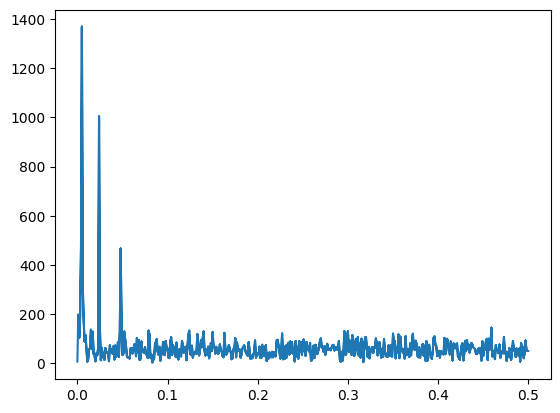

In [77]:
from scipy import fftpack

fourier = fftpack.fft(y)
power = np.abs(fourier)
freqs = fftpack.fftfreq(y.size)
plt.plot(np.abs(freqs), power)

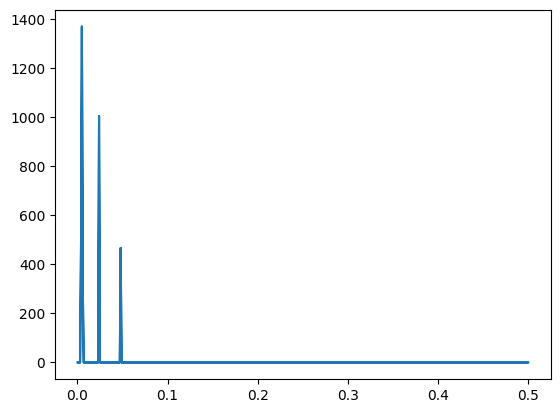

In [78]:
fourier[power<300] = 0
power = np.abs(fourier)
plt.plot(np.abs(freqs), power)

c:\sdk\ml\.env\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\sdk\ml\.env\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


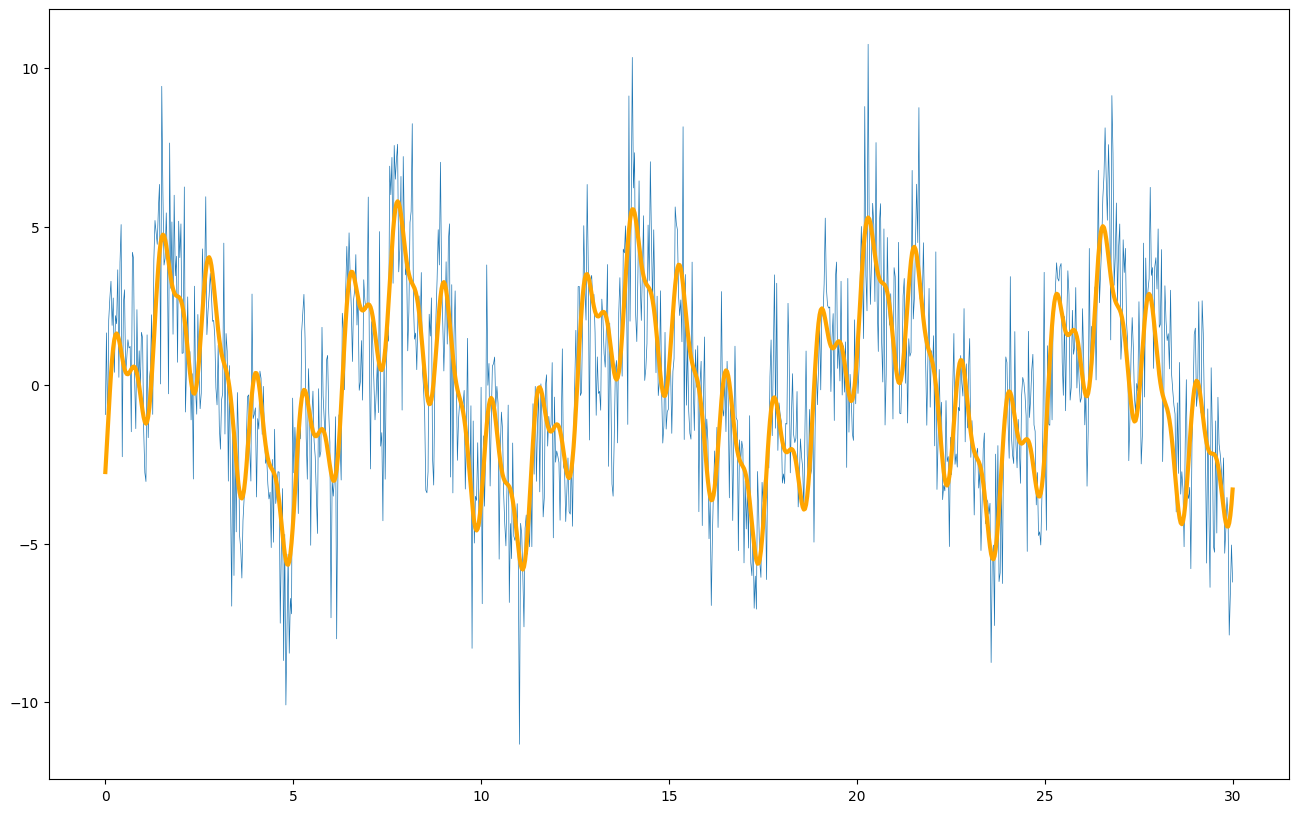

In [79]:
clean_sig = fftpack.ifft(fourier)
plt.figure(figsize=(16, 10))
plt.plot(x, y, lw=0.5, zorder=-1)
plt.plot(x, clean_sig, zorder=1, lw=3, c='orange')
plt.show()

## ND Image

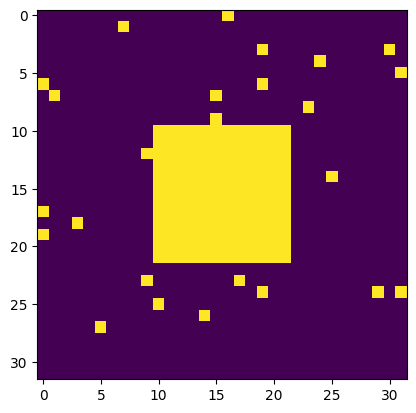

In [80]:
from scipy import ndimage

np.random.seed(0)
X = np.zeros((32, 32))
X[10:-10, 10:-10] = 1
X[np.random.randint(0, 32, 30), np.random.randint(0, 32, 30)] = 1
plt.imshow(X)

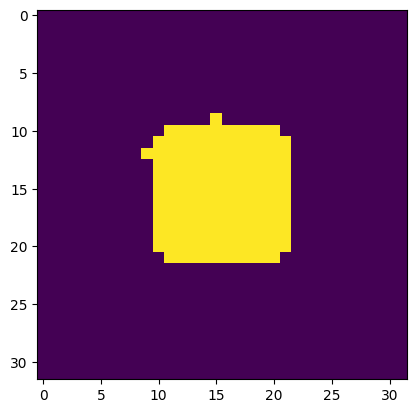

In [81]:
open_x = ndimage.binary_opening(X)
plt.imshow(open_x)

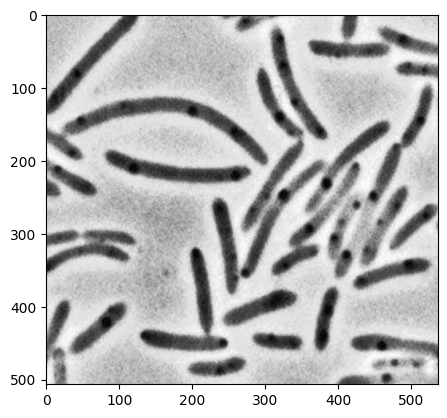

In [82]:
image = plt.imread("dataset/bacteria.png")
image = np.mean(image, axis=2)
plt.imshow(image, cmap="gray")

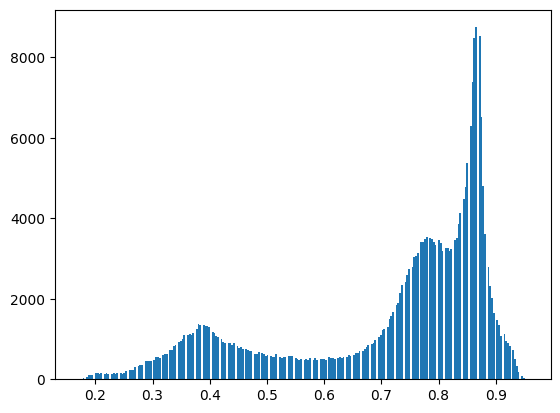

In [83]:
image_2 = np.copy(image)
plt.hist(image_2.ravel(), bins=255)
plt.show()

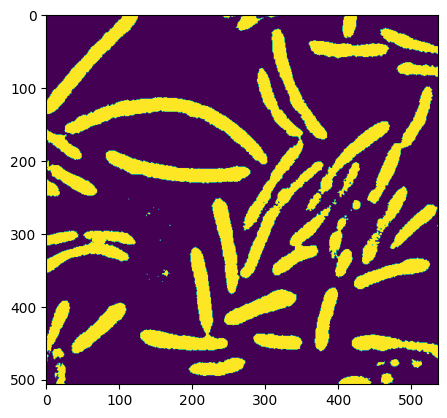

In [84]:
image = image < 0.6
plt.imshow(image)

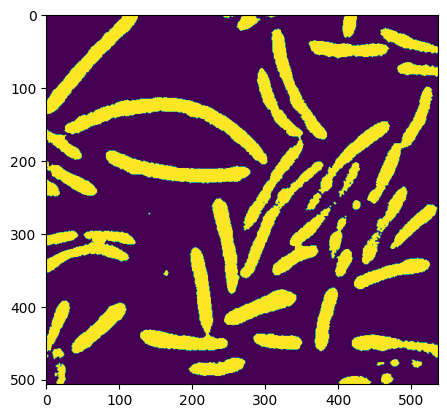

In [85]:
open_x = ndimage.binary_opening(image)
plt.imshow(open_x)